## AutoEncoder

***Principal:***

***ENCODER  =>  HIDDEN LAYER  =>  DECODER***

1. **Overcomplete Autoencoder:** Num Neurons Hidden Layer >  Num Neurons Ouput Layer

2. **Undercomplete Autoencoder:** Num Neurons Output Layer >  Num Neurons Hidden Layer

3. The wights in Autoencoder are tied i.e. 

    Weight [Who] from Hidden Layer to Ouput Layer is Transpose of Weight [Wih] from Input Layer to Hidden Layer

    i.e. ***Who = Wih ^ T***

    The biases are not tied to each other.

4. Hidden layer is used to learn important features [compressed representation] from the Input data.

## Dimensionality Reduction using Linear Autoencoders

1. Linear Autoencoder can be used for PCA of data. ex. Input 3-D Data, Output 2D Data.

2. The data goes from Input to output without any activation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
# Make Random Dataset
# 2 Classes
# 3 features
# Num Samples = 100
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)

In [3]:
type(data)

tuple

In [4]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [7]:
scaled_data

array([[ 0.87649968,  0.22853374,  0.07476374],
       [ 0.84785217,  0.2348852 ,  0.06594552],
       [ 0.23982771,  0.60149768,  0.8701502 ],
       [ 0.84137697,  0.41189125,  0.11885864],
       [ 0.16015085,  0.91312154,  0.87641688],
       [ 0.98487142,  0.15642622,  0.06652932],
       [ 0.92980391,  0.08503292,  0.07830484],
       [ 0.99713171,  0.25350618,  0.11274473],
       [ 0.14313364,  1.        ,  0.80735381],
       [ 0.16719794,  0.66029518,  0.90032642],
       [ 0.14830987,  0.64524301,  0.80412811],
       [ 0.98162289,  0.34842076,  0.19671636],
       [ 0.72786524,  0.45099853,  0.10948558],
       [ 0.83864921,  0.17958805,  0.17510148],
       [ 0.75523013,  0.1675368 ,  0.14719832],
       [ 0.69026725,  0.48671705,  0.1269047 ],
       [ 0.78651904,  0.4704395 ,  0.00801568],
       [ 0.22094154,  0.68401073,  0.89924755],
       [ 0.90426064,  0.49575653,  0.05202993],
       [ 0.80499209,  0.43211924,  0.08357411],
       [ 0.81983375,  0.47008294,  0.094

In [8]:
# Features
X1 = scaled_data[:,0]
X2 = scaled_data[:,1]
X3 = scaled_data[:,2]

In [9]:
from mpl_toolkits.mplot3d import Axes3D

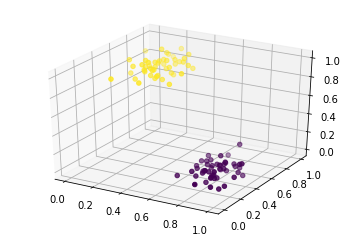

In [10]:
# Plot 3-D Data
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X1, X2, X3, c=data[1])

## Linear Autoencoder

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [12]:
# Neurons in Input Layer
n_inputs = 3

# Neurons in Hidden Layer
hidden = 2

# Neurons in Output Layer
n_outputs = 3

In [13]:
# Learning Rate
lr = 0.01

In [14]:
# Input Data
X = tf.placeholder(tf.float32, shape=[None,n_inputs])

In [15]:
# Hidden Layer
# Aim is to take 3-D data andconvert to 2-D by learning representations
h1 = fully_connected(X, hidden, activation_fn=None)

# Output is rescaled to 3-D from 2-D
output = fully_connected(h1, n_outputs, activation_fn=None)

In [16]:
# Loss Function
# This checks that how far the Ouptut is from reproducing the Input X
loss = tf.reduce_mean(tf.square(output - X))

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
n_steps = 5000

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(n_steps):
        _ , loss_val = sess.run([optimizer,loss], feed_dict={X: scaled_data})
        
        if step % 100 == 0:
            print('STEP: {0}\t , LOSS: {1}'.format(step, loss_val))
    
    # Use Hidden Layer to get the 2-D Data
    output_2d = h1.eval(feed_dict={X: scaled_data})

STEP: 0	 , LOSS: 0.622548520565033
STEP: 100	 , LOSS: 0.05970676243305206
STEP: 200	 , LOSS: 0.0036013361532241106
STEP: 300	 , LOSS: 0.0028909100219607353
STEP: 400	 , LOSS: 0.0025726156309247017
STEP: 500	 , LOSS: 0.002373734023422003
STEP: 600	 , LOSS: 0.0022434277925640345
STEP: 700	 , LOSS: 0.0021564399357885122
STEP: 800	 , LOSS: 0.0020986502058804035
STEP: 900	 , LOSS: 0.002060897648334503
STEP: 1000	 , LOSS: 0.002036851830780506
STEP: 1100	 , LOSS: 0.0020220328588038683
STEP: 1200	 , LOSS: 0.002013251418247819
STEP: 1300	 , LOSS: 0.00200826907530427
STEP: 1400	 , LOSS: 0.0020055710338056087
STEP: 1500	 , LOSS: 0.0020041794050484896
STEP: 1600	 , LOSS: 0.0020034960471093655
STEP: 1700	 , LOSS: 0.0020031766034662724
STEP: 1800	 , LOSS: 0.002003034343943
STEP: 1900	 , LOSS: 0.0020029740408062935
STEP: 2000	 , LOSS: 0.0020029491279274225
STEP: 2100	 , LOSS: 0.002002939349040389
STEP: 2200	 , LOSS: 0.002002935390919447
STEP: 2300	 , LOSS: 0.002002933993935585
STEP: 2400	 , LOSS: 0.0

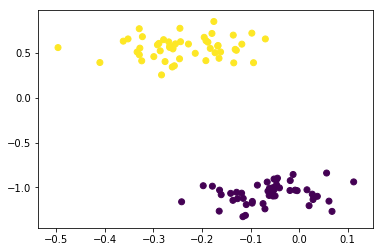

In [21]:
# Plot the 2-D Data
plt.scatter(output_2d[:,0], output_2d[:,1], c=data[1])

We cannot just look at the 2-D data made and tell that what data represents which feature on axis 1 and 2 as we are coming from 3-D data to 2-D data. For a small model we can look at the weights of the model and tell that how much each feature contributes to the output but for a large dataset this becomes difficult. It's the same problem that we face when using any other technique like PCA [Principal Component Analysis].